# Incident Management System

## Problem Statement:

A corp ABC is facing huge loss as finding difficulty handling the incident in time. Using Machine Learning we need to build a model where when we get an incident we are able to predict how long will it take for the incident to be closed with accuracy. Also to be able to predict if we will meet the given SLA or not. 

## Project Outcome:

The aim of the project is to be able to efficiently predict time taken for an incident to be resolved. By doing so we can plan our resources wisely for the incident type, and at the same time imrpove customers experience.

## Industry Review:



## Data Set Domain:

## Data Dictionary:

## Preprocessing/ Data Cleaning:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

### Importing data:

In [2]:
# data=pd.read_csv("/content/drive/My Drive/CAPSTONE/incident_event_log.csv")
data = pd.read_csv('incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### Understanding Data:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [4]:
print(f"Number of rows : {data.shape[0]}")
print(f"Number of columns : {data.shape[1]}")

Number of rows : 141712
Number of columns : 36


#### Duplicate values: 

In [5]:
# checking for any duplicate rows
print(f"Number of duplicate rows: {np.sum([data.duplicated()])}")

Number of duplicate rows: 0


we dont seem to have any duplicate values in the dataset

#### Missing values:

dataset has a lot of `?` we need to replace those with NaN so we can deal with them easily.

In [6]:
# replacing `?` with NaN
data = data.replace('?', np.nan)

In [7]:
# missing values
def get_missing(df):
    """take dataframe as input and return missing count and missing percent of the dataset"""

    missing_df = df.isnull().sum().sort_values(ascending=False).reset_index()
    missing_df = missing_df.rename(columns = {'index': 'column_name', 0:'missing_count'})

    missing_df['missing_percent'] = np.round(missing_df['missing_count']/df.shape[0]*100,2)
    
    return missing_df

In [8]:
# get missing
get_missing(data).set_index('column_name')

,missing_count,missing_percent
column_name,,
caused_by,141689,99.98
vendor,141468,99.83
cmdb_ci,141267,99.69
rfc,140721,99.30
problem_id,139417,98.38
sys_created_at,53076,37.45
sys_created_by,53076,37.45
u_symptom,32964,23.26
assigned_to,27496,19.40


**Inference:**    
    We have columns like `caused_by`, `vendor`, `cmdb_ci`, `rfc`, `problem_id` which have more than 95% of missing dataset. All these columns are actually very important however its possible the values are masked to maintain data security. Also as the columns might be unique as per the clients and their issues they might not be very useful for predicting target. hence removing the columns from the dataset.

#### Null treatment:

In [9]:
# removing columns which have more than 30% missing values
data1 = data.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id'],axis=1)

In [10]:
# checking missing values of the new data1
get_missing(data1)

,column_name,missing_count,missing_percent
0,sys_created_at,53076,37.45
1,sys_created_by,53076,37.45
2,u_symptom,32964,23.26
3,assigned_to,27496,19.40
4,assignment_group,14213,10.03
5,opened_by,4835,3.41
6,resolved_at,3141,2.22
7,closed_code,714,0.50
8,resolved_by,226,0.16
9,subcategory,111,0.08


In [11]:
# imputing categorical columns with mode
for i in ['u_symptom','assigned_to','assignment_group','opened_by','closed_code','resolved_by','subcategory','category','location','caller_id']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])
    

In [12]:
# resolved at is date column so its better to fill null values with forward filling
data1['resolved_at'].fillna(method='ffill', inplace=True)

In [13]:
# sys_created_at is almost close to opened_at column replacing values where sys_created_at == null with 'opened_at'
data1.loc[data1.sys_created_at.isnull(),'sys_created_at'] = data1.loc[data1.sys_created_at.isnull(),'opened_at']

In [14]:
# there is no way to predict the values for `sys_created_by` but we can probably use forward filling method for now as we dont want to miss out on any information
data1['sys_created_by'].fillna(method='ffill', inplace=True)


In [15]:
# checking missing percentage again
get_missing(data1)

,column_name,missing_count,missing_percent
0,closed_at,0,0.0
1,contact_type,0,0.0
2,incident_state,0,0.0
3,active,0,0.0
4,reassignment_count,0,0.0
5,reopen_count,0,0.0
6,sys_mod_count,0,0.0
7,made_sla,0,0.0
8,caller_id,0,0.0
9,opened_by,0,0.0


**Inference:**
    we have dealt with missing values by doing the required imputation, and there seem to be no missing values any more in any of the columns.

#### Understanding data types:

In [16]:
print(f"Data shape after null treatment : {data1.shape}")

print("Columns and their datatypes:")
data1.dtypes

Data shape after null treatment : (141712, 31)
Columns and their datatypes:


number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
closed_code                object
resolved_by                object
resolved_at   

**Inference:**
    We can see that date columns like `sys_created_at`, `opened_at`, `sys_updated_at`, `resolved_at` and `closed_at` are also listed as 'Object' datatype which is not accurate.

## Data Preprocessing: 

In [17]:
# here we see a lot of columns which are actually dates but not categories
dates = ['sys_created_at', 'opened_at', 'resolved_at', 'closed_at', 'sys_updated_at']

# updating datatype of the date columns

for feat in dates:
    data1[feat] = pd.to_datetime(data1[feat], format='%d/%m/%Y %H:%M')

In [18]:
# rechecking the datatypes
data1.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at             datetime64[ns]
sys_updated_by                     object
sys_updated_at             datetime64[ns]
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
impact                             object
urgency                            object
priority                           object
assignment_group                   object
assigned_to                       

In [19]:
# lets get our numerical , categorical and datetime features separately
feat_num = data1.select_dtypes(np.number).columns.tolist()
print(f"Numerical columns : {len(feat_num)}\n{feat_num}\n")

# categorical and boolean features
feat_cat = data1.select_dtypes(['object', 'bool']).columns.tolist()
print(f"Categorical columns : {len(feat_cat)}\n{feat_cat}\n")      

# dates features
feat_dates = data1.select_dtypes(['datetime']).columns.tolist()
print(f"Datetime columns : {len(feat_dates)}\n{feat_dates}\n")      

Numerical columns : 3
['reassignment_count', 'reopen_count', 'sys_mod_count']

Categorical columns : 23
['number', 'incident_state', 'active', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by']

Datetime columns : 5
['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']



## Outliers:

In [20]:
# checking basic statistics of numerical features
data1[feat_num].describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


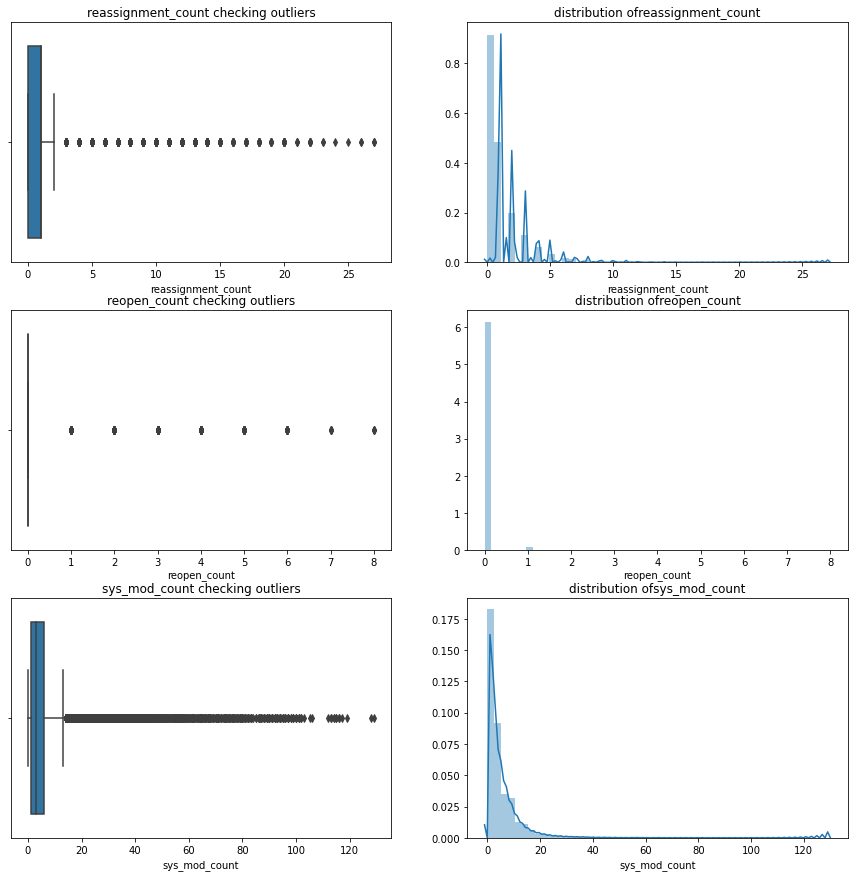

In [21]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

feat_ind = 0
for r in range(3):
    ax[r,0].set_title(feat_num[feat_ind]+' checking outliers')
    sns.boxplot(data1[feat_num[feat_ind]], ax = ax[r,0])
    
    ax[r,1].set_title('distribution of'+feat_num[feat_ind])
    sns.distplot(data1[feat_num[feat_ind]], ax =ax[r,1])
    
    feat_ind+=1

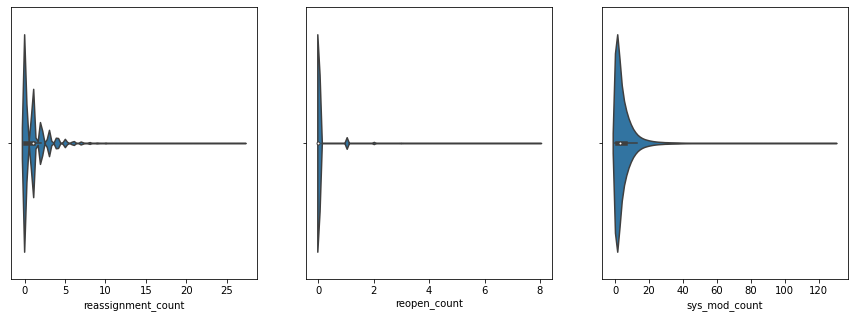

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

feat_ind=0
for c in range(3):
    sns.violinplot(data1[feat_num[feat_ind]], ax=ax[c])
    feat_ind+=1

**Inference:**
    We can see from the plots that 
    - `reassignment_count` : we have values from 0-27 however majority values are between 0-3 and rest seem to be at much lesser count i.e outliers.
    - `reopen_count` : we have values ranging from 0-8 however majority values are of 0 however we have very few values ranging from 2-8.
    - `sys_mod_count` : we have values ranging from 0-129 where majority values are between 0-6 and we have very less frequency for sys_mod_count > 20. 

**Inference:**
    If check outlier percent `reassignment_count`  has almost 13.8% outliers and `sys_mod_count` has almost 8% of data as outliers and capping them will affect the information, hence not capping the data.

### Transformation:

**Inference:** We are instead using transformation on `reassignment_count` and `sys_mod_count` to slightly normalize the data and leaving reopen_count as it is.

In [23]:

for i in feat_num:
    print(i)
    print(data1[i].skew())
   

reassignment_count
3.1117242166500447
reopen_count
15.56360442759793
sys_mod_count
4.74289730354474


In [24]:
 for i in feat_num:
        print(i)
        pow_i=(np.power(data1[i], 1/2))
        print('power_trans',pow_i.skew())
  

reassignment_count
power_trans 0.785100832181726
reopen_count
power_trans 8.774363974395316
sys_mod_count
power_trans 1.0930087059448597


In [25]:
 for i in feat_num:
        print(i)
        log_i=(np.log(data1[i]+1))
        print('log_trans',log_i.skew()) 

reassignment_count
log_trans 0.8874004206767511
reopen_count
log_trans 9.438002725053861
sys_mod_count
log_trans 0.28180105548444484


In [26]:
from scipy.stats import boxcox
from scipy.special import boxcox1p
for i in feat_num:
        print(i)
        boxcox_i=boxcox1p(data1[i],[0.01])
        print('boxcox_trans',boxcox_i.skew()) 

reassignment_count
boxcox_trans 0.8985913440876919
reopen_count
boxcox_trans 9.46576775090934
sys_mod_count
boxcox_trans 0.30372457442951717


best is power transformation so we go with it

In [27]:
data1['reassignment_count'] = np.power(data1['reassignment_count'], 1/2)
data1['reopen_count'] = np.power(data1['reopen_count'], 1/2)
data1['sys_mod_count'] = np.power(data1['sys_mod_count'], 1/2)


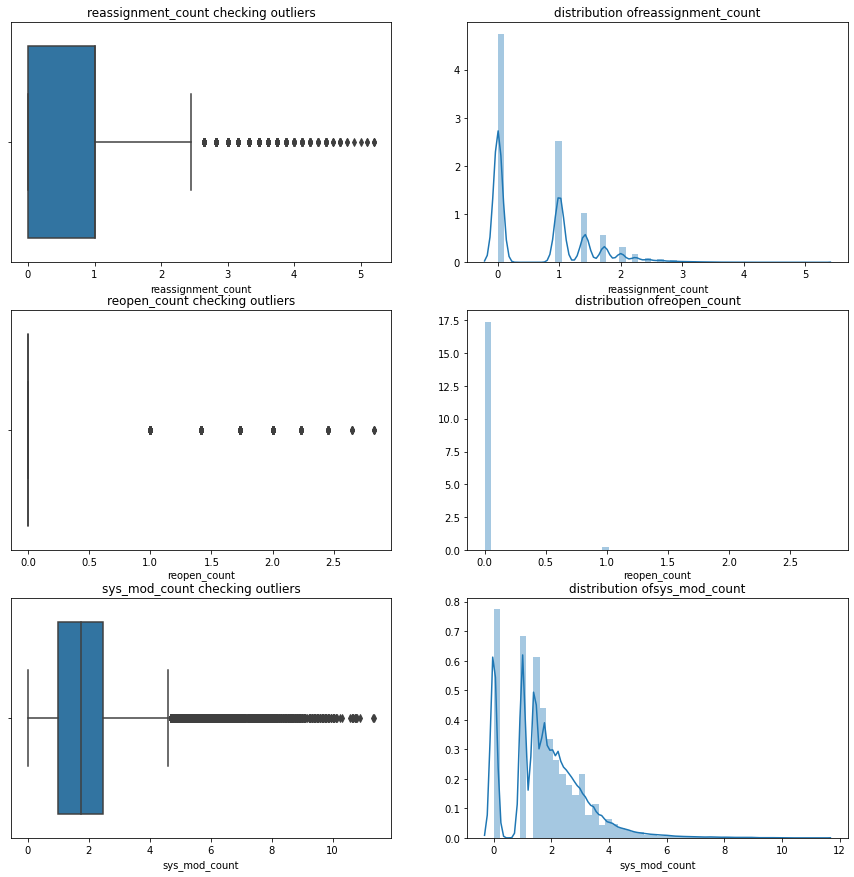

In [28]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

feat_ind = 0
for r in range(3):
    ax[r,0].set_title(feat_num[feat_ind]+' checking outliers')
    sns.boxplot(data1[feat_num[feat_ind]], ax = ax[r,0])
    
    ax[r,1].set_title('distribution of'+feat_num[feat_ind])
    sns.distplot(data1[feat_num[feat_ind]], ax =ax[r,1])
    
    feat_ind+=1

## Feature Engineering:

In [29]:
# creating predicted_closed_days column to predict sla timeline
data1['predicted_closed_days']=(data1.closed_at- data1.opened_at).dt.total_seconds()/ (24 * 60 * 60)
data1['predicted_closed_days'].describe()

count    141712.000000
mean         17.062177
std          27.156357
min           0.000000
25%           5.213194
50%           9.373611
75%          17.406250
max         341.275694
Name: predicted_closed_days, dtype: float64

In [30]:
# separating opened_at column for days, month, time
data1['opened_month']=data1.opened_at.dt.month
data1['opened_day'] = data1.opened_at.dt.day
data1['opened_hour'] = data1.opened_at.dt.hour
data1['opened_minute'] = data1.opened_at.dt.minute

In [31]:
#sys update time  to captre system update
data1['sys_upd_min']=(data1.sys_updated_at- data1.opened_at).dt.total_seconds()/ (24 * 60 )

In [32]:
data1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_upd_min
0,INC0000045,New,True,0.0,0.0,0.000000,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,0.291667
1,INC0000045,Resolved,True,0.0,0.0,1.414214,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,19.041667
2,INC0000045,Resolved,True,0.0,0.0,1.732051,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,25.541667
3,INC0000045,Closed,False,0.0,0.0,2.000000,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,326.833333
4,INC0000047,New,True,0.0,0.0,0.000000,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,6.222222,2,29,4,40,0.708333


# separating sys_updated_at column for days, month, time
data1['sys_updated_month']=data1.sys_updated_at.dt.month
data1['sys_updated_day'] = data1.sys_updated_at.dt.day
data1['sys_updated_hour'] = data1.sys_updated_at.dt.hour
data1['sys_updated_minute'] = data1.sys_updated_at.dt.minute

In [33]:
# counting unique values per categorical column
data1[feat_cat].nunique().sort_values(ascending=False)

number                     24918
caller_id                   5244
sys_updated_by               846
u_symptom                    525
subcategory                  254
assigned_to                  234
location                     224
resolved_by                  216
opened_by                    207
sys_created_by               185
assignment_group              78
category                      58
closed_code                   17
incident_state                 9
contact_type                   5
priority                       4
urgency                        3
impact                         3
knowledge                      2
u_priority_confirmation        2
notify                         2
made_sla                       2
active                         2
dtype: int64

In [34]:
data1.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'closed_code', 'resolved_by', 'resolved_at', 'closed_at',
       'predicted_closed_days', 'opened_month', 'opened_day', 'opened_hour',
       'opened_minute', 'sys_upd_min'],
      dtype='object')

from above list we can see that number,caller_id,opened_at,sys_created_by,sys_created_at,sys_updated_at,,location,
assignment_group,assigned_to are very unique or insignificant feature from domain expertise side
also 'closed_code','resolved_by', 'resolved_at', 'closed_at' ,made_sla is the information not available at the time of instance
so we r dropping all thes column from model building
also we can create single collumn based on urgency,impact,priority to reduce multicollinearity

## Preparing data for modelling:

In [39]:
data1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_upd_min
0,INC0000045,New,True,0.0,0.0,0.000000,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,0.291667
1,INC0000045,Resolved,True,0.0,0.0,1.414214,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 642,2016-02-29 08:53:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,19.041667
2,INC0000045,Resolved,True,0.0,0.0,1.732051,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,25.541667
3,INC0000045,Closed,False,0.0,0.0,2.000000,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,3 - Moderate,Group 56,Resolver 17,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,5.447222,2,29,1,16,326.833333
4,INC0000047,New,True,0.0,0.0,0.000000,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 746,2016-02-29 04:57:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,6.222222,2,29,4,40,0.708333


In [42]:
# filtering data for unresolved and not closed incidents

data2 = data1[(data1.incident_state!='Resolved')&(data1.incident_state!='Closed')]


In [43]:
data2 = data2.drop(['closed_code','resolved_by', 'resolved_at', 'closed_at','made_sla','number','caller_id','opened_at','notify','sys_created_by',
'sys_created_at','active','impact','urgency','sys_updated_at'], axis=1)

'closed_code','resolved_by', 'resolved_at', 'closed_at','made_sla','number','caller_id','opened_at','notify','sys_created_by',
'sys_created_at','active','impact','urgency'

In [44]:
data2 = data2.reset_index(drop=True)

In [45]:
data2.head()

,incident_state,reassignment_count,reopen_count,sys_mod_count,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_upd_min
0,New,0.0,0.0,0.000000,Opened by 8,Updated by 21,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,3 - Moderate,Group 56,Resolver 17,True,False,5.447222,2,29,1,16,0.291667
1,New,0.0,0.0,0.000000,Opened by 397,Updated by 746,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 70,Resolver 89,True,False,6.222222,2,29,4,40,0.708333
2,Active,1.0,0.0,1.000000,Opened by 397,Updated by 21,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,Resolver 31,True,False,6.222222,2,29,4,40,2.083333
3,Active,1.0,0.0,1.414214,Opened by 397,Updated by 21,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,Resolver 31,True,False,6.222222,2,29,4,40,2.208333
4,Active,1.0,0.0,1.732051,Opened by 397,Updated by 804,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,Resolver 31,True,False,6.222222,2,29,4,40,17.125000


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90976 entries, 0 to 90975
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incident_state           90976 non-null  object 
 1   reassignment_count       90976 non-null  float64
 2   reopen_count             90976 non-null  float64
 3   sys_mod_count            90976 non-null  float64
 4   opened_by                90976 non-null  object 
 5   sys_updated_by           90976 non-null  object 
 6   contact_type             90976 non-null  object 
 7   location                 90976 non-null  object 
 8   category                 90976 non-null  object 
 9   subcategory              90976 non-null  object 
 10  u_symptom                90976 non-null  object 
 11  priority                 90976 non-null  object 
 12  assignment_group         90976 non-null  object 
 13  assigned_to              90976 non-null  object 
 14  knowledge             

In [47]:
feat_cat = data2.select_dtypes(['object','bool'])
feat_num = data2.select_dtypes(np.number)

In [48]:

feat_cat.head(2)

,incident_state,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation
0,New,Opened by 8,Updated by 21,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,3 - Moderate,Group 56,Resolver 17,True,False
1,New,Opened by 397,Updated by 746,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 70,Resolver 89,True,False


In [49]:
uni_count=feat_cat.nunique().sort_values(ascending=False)
lb_cat=uni_count[uni_count>50]
one_hot_cat=uni_count[uni_count<10]

In [50]:
lb_cat.index

Index(['sys_updated_by', 'u_symptom', 'subcategory', 'assigned_to', 'location',
       'opened_by', 'assignment_group', 'category'],
      dtype='object')

In [51]:
feat_num.head(2)

,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_upd_min
0,0.0,0.0,0.0,5.447222,2,29,1,16,0.291667
1,0.0,0.0,0.0,6.222222,2,29,4,40,0.708333


In [52]:
# applying label encoding to ordinal data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feat_cat_encoded= feat_cat.apply(le.fit_transform)


In [53]:
#combining the encoded and scaled the data
data_final = pd.concat([feat_cat_encoded, feat_num], axis=1)
data_final.head(10)

,incident_state,opened_by,sys_updated_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,reassignment_count,reopen_count,sys_mod_count,predicted_closed_days,opened_month,opened_day,opened_hour,opened_minute,sys_upd_min
0,6,200,95,3,42,46,68,499,2,47,72,1,0,0.0,0.0,0.000000,5.447222,2,29,1,16,0.291667
1,6,120,548,3,61,30,111,351,2,63,220,1,0,0.0,0.0,0.000000,6.222222,2,29,4,40,0.708333
2,1,120,95,3,61,30,111,351,2,15,164,1,0,1.0,0.0,1.000000,6.222222,2,29,4,40,2.083333
3,1,120,95,3,61,30,111,351,2,15,164,1,0,1.0,0.0,1.414214,6.222222,2,29,4,40,2.208333
4,1,120,596,3,61,30,111,351,2,15,164,1,0,1.0,0.0,1.732051,6.222222,2,29,4,40,17.125000
5,1,120,509,3,61,30,111,351,2,15,164,1,0,1.0,0.0,2.000000,6.222222,2,29,4,40,17.166667
6,1,120,194,3,61,30,111,351,2,15,164,1,0,1.0,0.0,2.236068,6.222222,2,29,4,40,71.416667
7,4,120,194,3,61,30,111,351,2,15,220,1,0,1.0,0.0,2.449490,6.222222,2,29,4,40,71.416667
8,6,200,95,3,102,9,25,351,2,63,72,1,0,0.0,0.0,0.000000,5.868056,2,29,6,10,0.666667
9,6,200,95,3,102,9,25,351,2,63,72,1,0,0.0,0.0,1.000000,5.868056,2,29,6,10,1.166667


In [54]:
# scaling numerical data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sca = ss.fit_transform(data_final)



In [55]:
data_sc=pd.DataFrame(data_sca,columns=data_final.columns)

### Builiding Base Model

In [56]:
X=data_final.drop(["predicted_closed_days"],axis=1)
y=data_final["predicted_closed_days"]

In [57]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [58]:
#first ols model
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.406
Model:                               OLS   Adj. R-squared:                  0.405
Method:                    Least Squares   F-statistic:                     2069.
Date:                   Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                           17:00:25   Log-Likelihood:            -2.8849e+05
No. Observations:                  63683   AIC:                         5.770e+05
Df Residuals:                      63661   BIC:                         5.772e+05
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0402      2.474     -0.016      0.987      -4.889       4.809
incident_state              0.4013      0.041      9.706      0.000       0.320       0.482
opened_by                  -0.0018      0.001     -1.314      0.189      -0.005       0.001
sys_updated_by             -0.0015      0.000     -4.000      0.000      -0.002      -0.001
contact_type                3.4474      0.792      4.351      0.000       1.894       5.000
location                    0.0025      0.001      1.828      0.068      -0.000       0.005
category                    0.0074      0.006      1.192      0.233      -0.005       0.020
subcategory                -0.0081      0.001     -5.744      0.000      -0.011      -0.005
u_symptom                  -0.0025      0.001     -3.142      0.002      -0.004      -0.001
priority                    1.4777      0.269      5.495      0.000       0.951       2.005
assignment_group           -0.0070      0.004     -1.699      0.089      -0.015       0.001
assigned_to                 0.0210      0.002     12.597      0.000       0.018       0.024
knowledge                   5.5288      0.291     18.993      0.000       4.958       6.099
u_priority_confirmation     0.6254      0.931      0.672      0.502      -1.199       2.449
reassignment_count         -0.5005      0.176     -2.841      0.004      -0.846      -0.155
reopen_count               -3.0123      0.856     -3.517      0.000      -4.691      -1.334
sys_mod_count               0.1762      0.136      1.293      0.196      -0.091       0.443
opened_month               -0.3291      0.108     -3.041      0.002      -0.541      -0.117
opened_day                 -0.0345      0.011     -3.033      0.002      -0.057      -0.012
opened_hour                 0.0116      0.023      0.511      0.610      -0.033       0.056
opened_minute              -0.0074      0.005     -1.424      0.154      -0.017       0.003
sys_upd_min                 0.0203      0.000    141.616      0.000       0.020       0.021
==============================================================================
Omnibus:                    71473.014   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6019215.580
Skew:                           5.932   Prob(JB):                         0.00
Kurtosis:                      49.127   Cond. No.                     2.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Inference:**
    - the data has high multicolinearity 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=X.columns.tolist()
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by='vif',ascending=False)

,columns,vif
3,contact_type,119.712810
8,priority,35.091688
16,opened_month,23.119509
15,sys_mod_count,10.447379
18,opened_hour,10.102994
7,u_symptom,9.158551
5,category,5.450412
9,assignment_group,5.198751
10,assigned_to,4.782142
17,opened_day,4.725661


In [62]:
inp1 = X.drop(['contact_type','priority'], axis=1)


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=inp1.columns.tolist()
vif['vif']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,columns,vif
14,opened_month,14.605673
13,sys_mod_count,9.947070
16,opened_hour,9.086513
6,u_symptom,8.442295
4,category,5.208933
7,assignment_group,4.702337
11,reassignment_count,4.635168
8,assigned_to,4.300345
15,opened_day,4.117820
5,subcategory,3.809897


In [64]:
# checking model after removing columns causing high multi-colinearity
X_constant=sm.add_constant(inp1)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.408
Model:                               OLS   Adj. R-squared:                  0.407
Method:                    Least Squares   F-statistic:                     3293.
Date:                   Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                           17:02:48   Log-Likelihood:            -4.1247e+05
No. Observations:                  90976   AIC:                         8.250e+05
Df Residuals:                      90956   BIC:                         8.252e+05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.5182      0.705     17.754      0.000      11.136      13.900
incident_state              0.3739      0.035     10.769      0.000       0.306       0.442
opened_by                  -0.0003      0.001     -0.263      0.792      -0.003       0.002
sys_updated_by             -0.0020      0.000     -6.064      0.000      -0.003      -0.001
location                    0.0021      0.001      1.791      0.073      -0.000       0.004
category                    0.0078      0.005      1.483      0.138      -0.002       0.018
subcategory                -0.0066      0.001     -5.560      0.000      -0.009      -0.004
u_symptom                  -0.0022      0.001     -3.375      0.001      -0.004      -0.001
assignment_group           -0.0041      0.003     -1.168      0.243      -0.011       0.003
assigned_to                 0.0193      0.001     13.762      0.000       0.017       0.022
knowledge                   5.7695      0.243     23.718      0.000       5.293       6.246
u_priority_confirmation     0.1685      0.748      0.225      0.822      -1.298       1.635
reassignment_count         -0.5712      0.148     -3.871      0.000      -0.860      -0.282
reopen_count               -2.7562      0.699     -3.943      0.000      -4.126      -1.386
sys_mod_count               0.0979      0.114      0.857      0.391      -0.126       0.322
opened_month               -0.1888      0.089     -2.131      0.033      -0.362      -0.015
opened_day                 -0.0387      0.010     -4.059      0.000      -0.057      -0.020
opened_hour                 0.0389      0.019      2.045      0.041       0.002       0.076
opened_minute              -0.0092      0.004     -2.126      0.033      -0.018      -0.001
sys_upd_min                 0.0203      0.000    170.619      0.000       0.020       0.021
==============================================================================
Omnibus:                   104043.699   Durbin-Watson:                   0.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9628462.599
Skew:                           6.097   Prob(JB):                         0.00
Kurtosis:                      51.902   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluting the models

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# using input where we removed multicolinear features
xtrain, xtest, ytrain, ytest = train_test_split(inp1, y, test_size=0.3, random_state=0)

# build and train the model
rfe = RandomForestRegressor(random_state=0)
rfe.fit(xtrain, ytrain)



RandomForestRegressor(random_state=0)

In [68]:
#predict values
ypred_train = rfe.predict(xtrain)
ypred_test = rfe.predict(xtest)

#evaluating the metrics
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test))

rsquared_train = r2_score(ytrain, ypred_train)
rsquared_test = r2_score(ytest, ypred_test)

print(f"rsquared  - (Train) : {rsquared_train}")
print(f"root mean squared error - (Train) : {rmse_train}")


print(f"rsquared  - (Test) : {rsquared_test}")
print(f"root mean squared error - (Test) : {rmse_test}")

rsquared  - (Train) : 0.9622560194237225
root mean squared error - (Train) : 5.666556393270084
rsquared  - (Test) : 0.7476000561764964
root mean squared error - (Test) : 14.825122847250281


**Inference:**
    From the trainig score we get tha model scored 94% whereas testing is 74% which is a huge variation indicating model is overfit, also rmse of train indicates their is a huge variation.

### random search for rf

In [69]:
from sklearn import model_selection

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

rf=RandomForestRegressor()

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None]}

cv_rf = GridSearchCV(rf, cv = 3 ,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(inp1,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [74]:
cv_rf.best_params_

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto'}

In [75]:
#predict values
rf_best=RandomForestRegressor(**cv_rf.best_params_,random_state=10)
rf_best.fit(xtrain,ytrain)

ypred_train_cv = rf_best.predict(xtrain)
ypred_test_cv = rf_best.predict(xtest)

#evaluating the metrics
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train_cv))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test_cv))

rsquared_train = r2_score(ytrain, ypred_train_cv)
rsquared_test = r2_score(ytest, ypred_test_cv)

print(f"rsquared  - (Train) : {rsquared_train}")
print(f"root mean squared error - (Train) : {rmse_train}")


print(f"rsquared  - (Test) : {rsquared_test}")
print(f"root mean squared error - (Test) : {rmse_test}")

rsquared  - (Train) : 0.46409672754131726
root mean squared error - (Train) : 21.352000438547027
rsquared  - (Test) : 0.491659938883217
root mean squared error - (Test) : 21.039278488879102


In [85]:
RF_be1=[]
RF_ve1=[]
for n in [20,30,40,50,80,100]:
  RF=RandomForestRegressor(n_estimators=n,**cv_rf.best_params_,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(RF,inp1,y,cv=kfold)
  RF_be1.append(np.mean(1-scores))
  RF_ve1.append(np.std(scores,ddof=1))


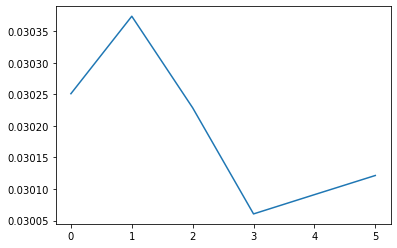

In [79]:
x_axis=np.arange(len(RF_ve1))
plt.plot(x_axis,RF_ve1)

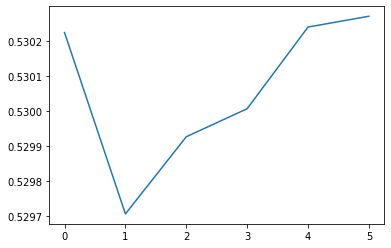

In [86]:
x_axis=np.arange(len(RF_be1))
plt.plot(x_axis,RF_be1)

In [82]:
RF_be=[]
RF_ve=[]
for n in [100,120,150,200,250]:
  RF=RandomForestRegressor(n_estimators=n,**cv_rf.best_params_,random_state=0)
  kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
  scores=model_selection.cross_val_score(RF,inp1,y,cv=kfold)
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

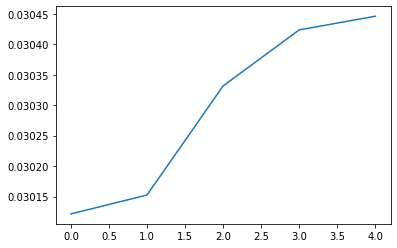

In [83]:
x_axis=np.arange(len(RF_ve))
plt.plot(x_axis,RF_ve)

In [93]:
#predict values
rf_best30=RandomForestRegressor(n_estimators=300,**cv_rf.best_params_,random_state=10)
rf_best30.fit(xtrain,ytrain)

ypred_train_cv30 = rf_best30.predict(xtrain)
ypred_test_cv30 = rf_best30.predict(xtest)

#evaluating the metrics
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train_cv30))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test_cv30))

rsquared_train = rf_best30(ytrain, ypred_train_cv30)
rsquared_test = rf_best30(ytest, ypred_test_cv30)

print(f"rsquared  - (Train) : {rsquared_train}")
print(f"root mean squared error - (Train) : {rmse_train}")


print(f"rsquared  - (Test) : {rsquared_test}")
print(f"root mean squared error - (Test) : {rmse_test}")

rsquared  - (Train) : 0.46443661065033637
root mean squared error - (Train) : 21.345228381253918
rsquared  - (Test) : 0.4921140638622393
root mean squared error - (Test) : 21.02987868208261


### Adaboost

In [94]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [96]:
RF_best=RandomForestRegressor(n_estimators=100,**cv_rf.best_params_,random_state=0)
RF=RandomForestRegressor(random_state=0)
KNN=KNeighborsRegressor(n_neighbors=97, weights='distance')
KNN_bag=BaggingRegressor(base_estimator=KNN,n_estimators=7,random_state=0)
RF_boost=AdaBoostRegressor(base_estimator=RF,n_estimators=4,random_state=0)

In [109]:
models = []
models.append(('RF_tune',RF_best))
models.append(('KNN',KNN))
models.append(('KNN_bag',KNN_bag))
models.append(('RF',RF))
models.append(('BoostedRF',RF_boost))

In [110]:
results = []
names = []
bias=[]
var=[]
acc=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = model_selection.cross_val_score(model, inp1, y,cv=kfold)
    results.append(cv_results)
    names.append(name)
    acc.append(np.mean(cv_results))
    bias.append(np.mean(1-cv_results))
    var.append(np.std(cv_results,ddof=1))
    print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))


RF_tune: 0.530271 (0.030121)
KNN: 0.473779 (0.023284)
KNN_bag: 0.488943 (0.025408)
RF: 0.248603 (0.008660)
BoostedRF: 0.236949 (0.011024)


In [122]:
result_df_all=pd.DataFrame({'Name':names,'Accuracy':acc,'Bias':bias,'Variance':var})

In [123]:
result_df_all

,Name,Accuracy,Bias,Variance
0,RF_tune,0.469729,0.530271,0.030121
1,KNN,0.526221,0.473779,0.023284
2,KNN_bag,0.511057,0.488943,0.025408
3,RF,0.751397,0.248603,0.008660
4,BoostedRF,0.763051,0.236949,0.011024


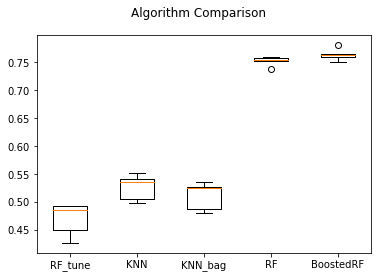

In [113]:
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [116]:
#fitting adaboost
RF_boost.fit(xtrain,ytrain)

ypred_train_adb = RF_boost.predict(xtrain)
ypred_test_adb = RF_boost.predict(xtest)

#evaluating the metrics
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train_adb))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test_adb))

rsquared_train = r2_score(ytrain, ypred_train_adb)
rsquared_test = r2_score(ytest, ypred_test_adb)

print(f"rsquared  - (Train) : {rsquared_train}")
print(f"root mean squared error - (Train) : {rmse_train}")


print(f"rsquared  - (Test) : {rsquared_test}")
print(f"root mean squared error - (Test) : {rmse_test}")

rsquared  - (Train) : 0.9688400046224684
root mean squared error - (Train) : 5.1486581508456615
rsquared  - (Test) : 0.7478193630062508
root mean squared error - (Test) : 14.818680775212151


In [118]:
result_df

,Name,Accuracy,Bias,Variance
0,RF_tune,0.469729,0.530271,0.030121
1,KNN,0.526221,0.473779,0.023284
2,KNN_bag,0.511057,0.488943,0.025408
3,RF,0.751397,0.248603,0.008660
4,BoostedRF,0.763051,0.236949,0.011024


In [120]:
#adaboost with tuned rf
RF_boost_tune=AdaBoostRegressor(base_estimator=RF_best,n_estimators=4,random_state=0)
kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
cv_results = model_selection.cross_val_score(RF_boost_tune, inp1, y,cv=kfold)
result_df['Name']='RF_boost_tune'
result_df['Accuracy']=np.mean(cv_results)
result_df['Bias']=np.mean(1-cv_results)
result_df['Variance']=np.std(cv_results,ddof=1)
print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))

BoostedRF: 0.675436 (0.037661)


In [124]:
result_df

,Name,Accuracy,Bias,Variance
0,RF_boost_tune,0.324564,0.675436,0.037661
1,RF_boost_tune,0.324564,0.675436,0.037661
2,RF_boost_tune,0.324564,0.675436,0.037661
3,RF_boost_tune,0.324564,0.675436,0.037661
4,RF_boost_tune,0.324564,0.675436,0.037661
